In [1]:
train <- read.csv("Train_UWu5bXk.csv")
test <- read.csv("Test_u94Q5KV.csv")

In [2]:
dim(train) #number rows and columns
dim(test)

[1] 8523   12

[1] 5681   11

In [3]:
head(train,5)
head(test,5)

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility
1 FDA15            9.30       Low Fat          0.01604730     
2 DRC01            5.92       Regular          0.01927822     
3 FDN15           17.50       Low Fat          0.01676007     
4 FDX07           19.20       Regular          0.00000000     
5 NCD19            8.93       Low Fat          0.00000000     
  Item_Type             Item_MRP Outlet_Identifier Outlet_Establishment_Year
1 Dairy                 249.8092 OUT049            1999                     
2 Soft Drinks            48.2692 OUT018            2009                     
3 Meat                  141.6180 OUT049            1999                     
4 Fruits and Vegetables 182.0950 OUT010            1998                     
5 Household              53.8614 OUT013            1987                     
  Outlet_Size Outlet_Location_Type Outlet_Type       Item_Outlet_Sales
1 Medium      Tier 1               Supermarket Type1 3735.1380        
2 Medium      Tier 3               Supermarket Type2  443.4228        
3 Medium      Tier 1               Supermarket Type1 2097.2700        
4             Tier 3               Grocery Store      732.3800        
5 High        Tier 3               Supermarket Type1  994.7052

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type  
1 FDW58           20.750      Low Fat          0.007564836     Snack Foods
2 FDW14            8.300      reg              0.038427677     Dairy      
3 NCN55           14.600      Low Fat          0.099574908     Others     
4 FDQ58            7.315      Low Fat          0.015388393     Snack Foods
5 FDY38               NA      Regular          0.118599314     Dairy      
  Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size
1 107.8622 OUT049            1999                      Medium     
2  87.3198 OUT017            2007                                 
3 241.7538 OUT010            1998                                 
4 155.0340 OUT017            2007                                 
5 234.2300 OUT027            1985                      Medium     
  Outlet_Location_Type Outlet_Type      
1 Tier 1               Supermarket Type1
2 Tier 2               Supermarket Type1
3 Tier 3               Grocery Store    
4 Tier 2               Supermarket Type1
5 Tier 3               Supermarket Type3

In [4]:
test$Item_Outlet_Sales <-  1 #train has one dimension more (Item_Outlet_Sales) --> add column before joining
combi <- rbind(train, test)
combi$Item_Weight[is.na(combi$Item_Weight)] <- median(combi$Item_Weight, na.rm = TRUE) #median : most commonly used method of imputing missing value ; it is known to be highly robust to outliers
combi <- na.omit(combi)

In [5]:
#rename entries 
library(plyr)
combi$Item_Fat_Content <- revalue(combi$Item_Fat_Content,c("LF" = "Low Fat", "low fat" = "Low Fat"))
combi$Item_Fat_Content <- revalue(combi$Item_Fat_Content, c("reg" = "Regular"))

In [6]:
#remove some category values
library(dplyr) #necessary library for select()
combi <- select(combi, -c(Item_Identifier, Outlet_Identifier, Outlet_Establishment_Year))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
new_train <- combi[1:nrow(train),] #divide dataframe: new_train / new_test
new_test <- combi[-(1:nrow(train)),]

### Linear (multiple) regression

In [8]:
linear_model <- lm(Item_Outlet_Sales ~ ., data = new_train)
summary(linear_model)
# Significant variables are marked with (*) --> Signif. codes

#often log is used
#linear_model <- lm(log(Item_Outlet_Sales) ~ ., data = new_train)
#summary(linear_model)


Call:
lm(formula = Item_Outlet_Sales ~ ., data = new_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4331.4  -674.7   -86.4   569.2  7945.6 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1931.7748    94.9626 -20.342  < 2e-16 ***
Item_Weight                       -0.4188     2.9162  -0.144  0.88580    
Item_Fat_ContentRegular           41.1501    28.2456   1.457  0.14519    
Item_Visibility                 -300.6816   248.8594  -1.208  0.22699    
Item_TypeBreads                    1.0685    84.0844   0.013  0.98986    
Item_TypeBreakfast                 8.6031   116.6706   0.074  0.94122    
Item_TypeCanned                   24.5055    62.8021   0.390  0.69640    
Item_TypeDairy                   -40.4484    62.2628  -0.650  0.51594    
Item_TypeFrozen Foods            -25.8663    58.8967  -0.439  0.66054    
Item_TypeFruits and Vegetables    28.2678    54.9874   0.514  0.60721    
Item_TypeHard Dr

In [9]:
#cor(new_train)
str(new_train)

'data.frame':	8523 obs. of  9 variables:
 $ Item_Weight         : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content    : Factor w/ 2 levels "Low Fat","Regular": 1 2 1 2 1 2 2 1 2 2 ...
 $ Item_Visibility     : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type           : Factor w/ 16 levels "Baking Goods",..: 5 15 11 7 10 1 14 14 6 6 ...
 $ Item_MRP            : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Size         : Factor w/ 4 levels "","High","Medium",..: 3 3 3 1 2 3 2 3 1 1 ...
 $ Outlet_Location_Type: Factor w/ 3 levels "Tier 1","Tier 2",..: 1 3 1 3 3 3 3 3 2 2 ...
 $ Outlet_Type         : Factor w/ 4 levels "Grocery Store",..: 2 3 2 1 2 3 2 4 2 2 ...
 $ Item_Outlet_Sales   : num  3735 443 2097 732 995 ...


In [10]:
levels(new_train$Item_Fat_Content)
levels(new_train$Item_Type)
levels(new_train$Outlet_Size)
levels(new_train$Outlet_Location_Type)
levels(new_train$Outlet_Type)

[1] "Low Fat" "Regular"

[1] "Baking Goods"          "Breads"                "Breakfast"            
 [4] "Canned"                "Dairy"                 "Frozen Foods"         
 [7] "Fruits and Vegetables" "Hard Drinks"           "Health and Hygiene"   
[10] "Household"             "Meat"                  "Others"               
[13] "Seafood"               "Snack Foods"           "Soft Drinks"          
[16] "Starchy Foods"

[1] ""       "High"   "Medium" "Small"

[1] "Tier 1" "Tier 2" "Tier 3"

[1] "Grocery Store"     "Supermarket Type1" "Supermarket Type2"
[4] "Supermarket Type3"

In [11]:
#to calculate cor(new_train) all variables must be "numeric"
new_train$Item_Fat_Content <- as.numeric(new_train$Item_Fat_Content)
new_train$Item_Type <- as.numeric(new_train$Item_Type)
new_train$Outlet_Size <- as.numeric(new_train$Outlet_Size)
new_train$Outlet_Location_Type <- as.numeric(new_train$Outlet_Location_Type)
new_train$Outlet_Type <- as.numeric(new_train$Outlet_Type)

In [12]:
class(new_train$Item_Fat_Content)
#class(new_train$Item_Type)
#class(new_train$Outlet_Size)
#class(new_train$Outlet_Location_Type)
#class(new_train$Outlet_Type)

[1] "numeric"

In [13]:
#e.g.
#Outlet_Size --> old levels: '' 'High' 'Medium' 'Small' ; new assignment: 1,2,3,4
#Outlet_Location_Type --> old levels: 'Tier 1' 'Tier 2' 'Tier 3' ; new assignment: 1,2,3
#Outlet_Type --> old levels: 'Grocery Store' 'Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3' ; new assignment: 1,2,3,4

In [14]:
cor(new_train)

Item_Weight  Item_Fat_Content Item_Visibility Item_Type   
Item_Weight           1.000000000 -0.0210920104    -0.014167543     0.028037521
Item_Fat_Content     -0.021092010  1.0000000000     0.047314358    -0.139434246
Item_Visibility      -0.014167543  0.0473143585     1.000000000    -0.035248829
Item_Type             0.028037521 -0.1394342456    -0.035248829     1.000000000
Item_MRP              0.024950560  0.0060628994    -0.001314848     0.032650737
Outlet_Size          -0.001412194  0.0005167156    -0.003107556    -0.002611057
Outlet_Location_Type  0.001958228 -0.0015984765    -0.028099191     0.003084154
Outlet_Type          -0.009973121  0.0021990092    -0.173467964     0.003053107
Item_Outlet_Sales     0.009692876  0.0187185336    -0.128624612     0.017047670
                     Item_MRP      Outlet_Size   Outlet_Location_Type
Item_Weight           0.0249505601 -0.0014121938  0.0019582277       
Item_Fat_Content      0.0060628994  0.0005167156 -0.0015984765       
Item_Visibility      -0.0013148480 -0.0031075565 -0.0280991915       
Item_Type             0.0326507373 -0.0026110565  0.0030841544       
Item_MRP              1.0000000000  0.0083204311  0.0002322058       
Outlet_Size           0.0083204311  1.0000000000 -0.3855965724       
Outlet_Location_Type  0.0002322058 -0.3855965724  1.0000000000       
Outlet_Type          -0.0019746190  0.1587548220  0.4672186616       
Item_Outlet_Sales     0.5675744467  0.0574637036  0.0893667468       
                     Outlet_Type  Item_Outlet_Sales
Item_Weight          -0.009973121  0.009692876     
Item_Fat_Content      0.002199009  0.018718534     
Item_Visibility      -0.173467964 -0.128624612     
Item_Type             0.003053107  0.017047670     
Item_MRP             -0.001974619  0.567574447     
Outlet_Size           0.158754822  0.057463704     
Outlet_Location_Type  0.467218662  0.089366747     
Outlet_Type           1.000000000  0.401522500     
Item_Outlet_Sales     0.401522500  1.000000000

In [15]:
#e.g.
cor(new_train$Item_Visibility, new_train$Item_Weight)
cor(new_train$Outlet_Location_Type, new_train$Outlet_Type=="2")

[1] -0.01416754

[1] -0.4727927

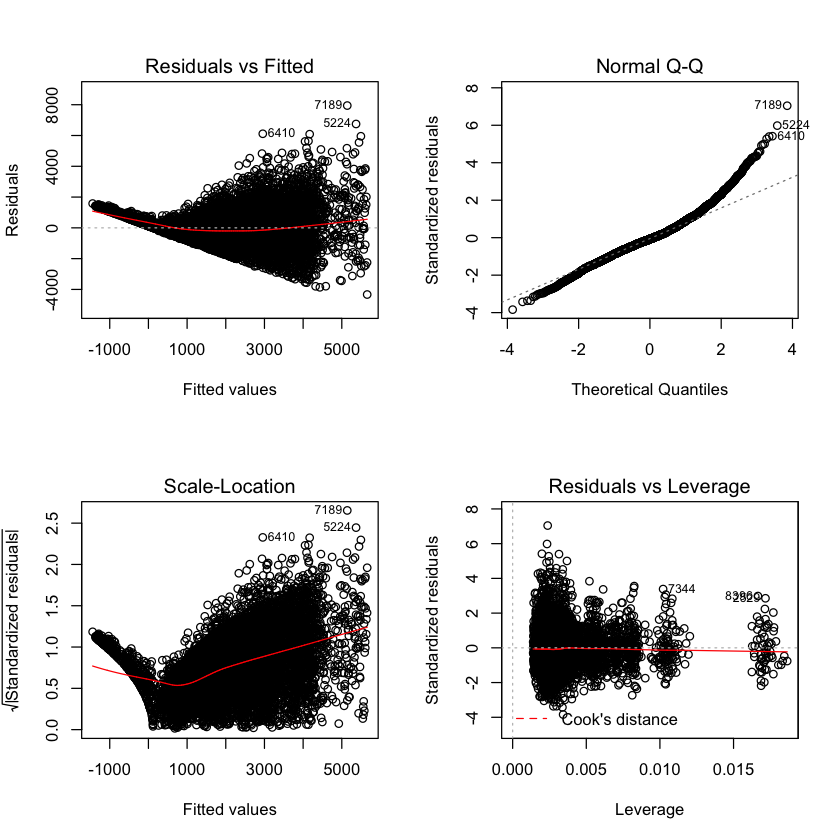

In [16]:
par(mfrow=c(2,2))
plot(linear_model)
#Residual values are the difference between actual and predicted outcome values. Fitted values are the predicted values

In [17]:
library(Metrics)

In [18]:
rmse(new_train$Item_Outlet_Sales, linear_model$fitted.values)

[1] 1127.775

### Decision trees

In [19]:
#load dependencies
library(rpart)
library(rpart.plot)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [20]:
#In R, decision tree uses a complexity parameter (cp); cp measures the tradeoff between model complexity and accuracy 
#on training set; smaller cp will lead to a bigger tree, which might overfit the model. Conversely, a large cp value 
#might underfit the model. Underfitting occurs when the model does not capture underlying trends properly. 
#optimum cp value calculated with 5 fold cross validation

In [21]:
#define validation
fitControl <- trainControl(method = "cv", number = 5)
#cv: cross validation; number: number of folds

In [22]:
#Create a data frame from all combinations of the supplied vectors or factors
cartGrid <- expand.grid(.cp=(1:50)*0.01)  
#cp: complexity parameter ; is used to control the size of the decision tree and to select the optimal tree size

In [23]:
#sets up a grid of tuning parameters for a number of classification and regression routines, fits each model and calculates a resampling based performance measure
tree_model <- train(Item_Outlet_Sales ~ ., data = new_train, method = "rpart", trControl = fitControl, tuneGrid = cartGrid)
#rpart : Recursive partitioning creates a decision tree that strives to correctly classify members of the population by splitting it into sub-populations based on several dichotomous (2 manifestations) independent variables. 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

In [24]:
print(tree_model)

CART 

8523 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6818, 6819, 6818, 6819, 6818 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE      
  0.01  1113.935  0.5751062   788.5707
  0.02  1137.918  0.5564449   808.4178
  0.03  1137.918  0.5564449   808.4178
  0.04  1256.682  0.4589211   949.5848
  0.05  1256.682  0.4589211   949.5848
  0.06  1289.226  0.4304963   967.7057
  0.07  1322.545  0.3998679   988.8979
  0.08  1322.545  0.3998679   988.8979
  0.09  1322.545  0.3998679   988.8979
  0.10  1322.545  0.3998679   988.8979
  0.11  1322.545  0.3998679   988.8979
  0.12  1322.545  0.3998679   988.8979
  0.13  1322.545  0.3998679   988.8979
  0.14  1322.545  0.3998679   988.8979
  0.15  1322.545  0.3998679   988.8979
  0.16  1398.552  0.3271581  1054.8580
  0.17  1491.125  0.2365812  1131.0299
  0.18  1491.125  0.2365812  1131.0299
  0.19  1491.125  0.2365812  1131.0299
  0.20  1491.125  0.2365812

In [25]:
#The final value for cp = 0.01. The model with cp = 0.01 has the least RMSE

In [26]:
main_tree <- rpart(Item_Outlet_Sales ~ ., data = new_train, control = rpart.control(cp=0.01))

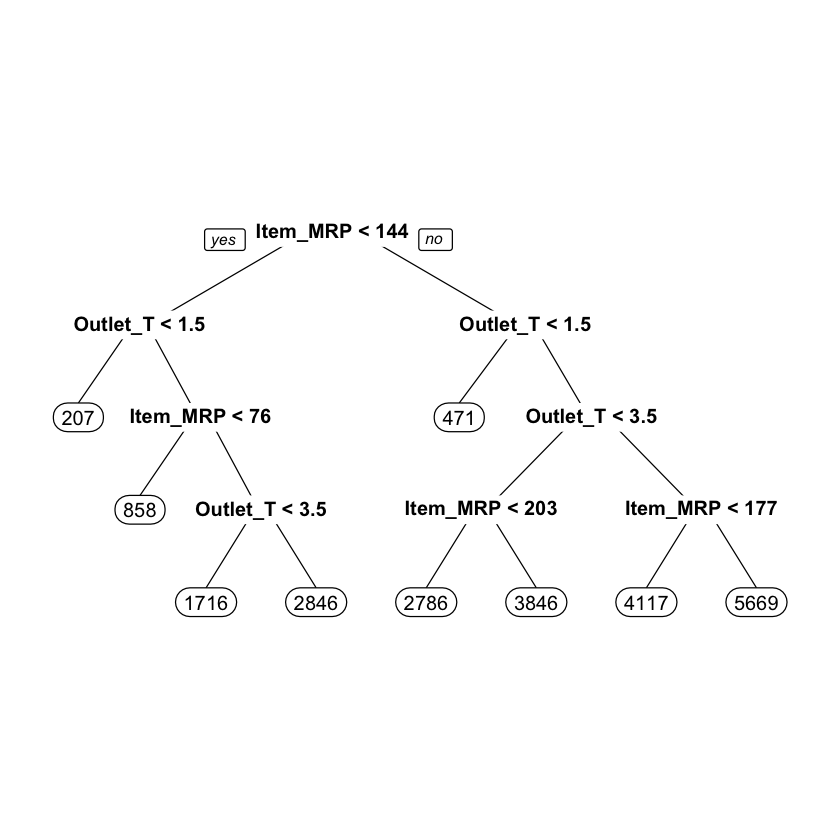

In [27]:
prp(main_tree)

In [28]:
pre_score <- predict(main_tree, type = "vector")   #Make a Raster object with predictions from a fitted model object

In [29]:
rmse(new_train$Item_Outlet_Sales, pre_score)

[1] 1102.774

# Random forest

In [30]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [31]:
control <- trainControl(method = "cv", number = 5)

In [32]:
rf_model <- randomForest(Item_Outlet_Sales ~ ., data = new_train, method = "parRF", trControl = control, prox = TRUE, allowParallel = TRUE)

In [33]:
print(rf_model)


Call:
 randomForest(formula = Item_Outlet_Sales ~ ., data = new_train,      method = "parRF", trControl = control, prox = TRUE, allowParallel = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 1214734
                    % Var explained: 58.28


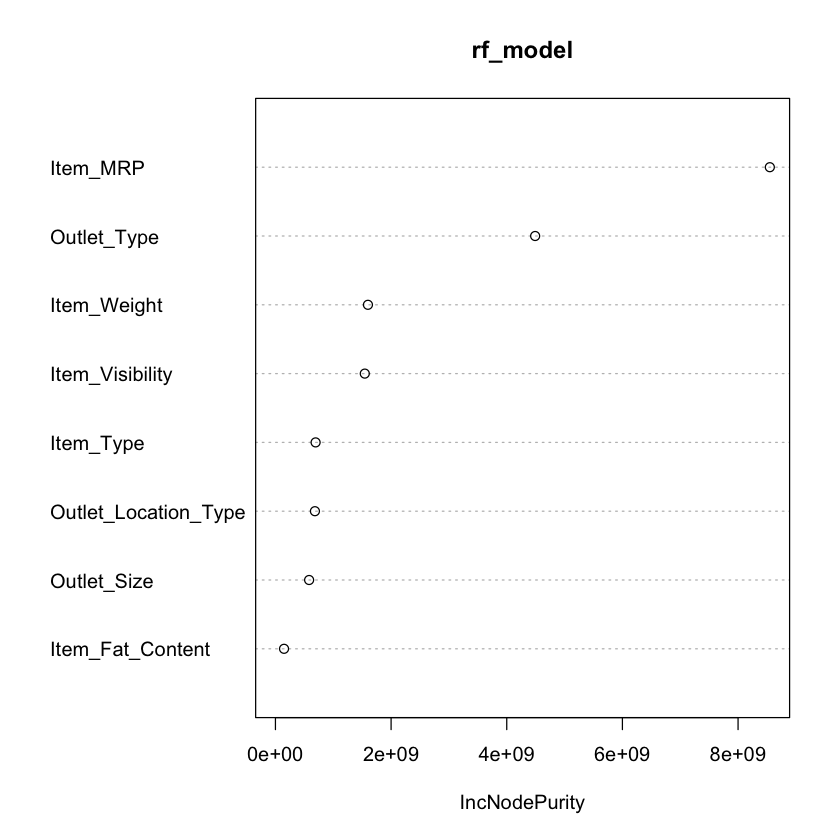

In [34]:
varImpPlot(rf_model)